# Import Package

In [ ]:
import pandas as pd
import numpy as np
import os
import statistics

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn .preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Analisis Data"
os.listdir(path)

['heart_attack_prediction_dataset.csv',
 'n_movies.csv',
 'produk.csv',
 'loan_prediction.csv',
 'Transaksi.csv',
 'chemical_cosmetic.csv',
 'data_jatim.csv',
 'data_jatim_1.csv']

In [ ]:
df = pd.read_csv(path + "/data_jatim_1.csv")
df.head

<bound method NDFrame.head of                 Nama Kota  Pravalensi Balita Stunting  Indeks Daya Beli  \
0       Kabupaten Pacitan                        20.6              0.68   
1      Kabupaten Ponorogo                        14.2              0.71   
2    Kabupaten Trenggalek                        19.5              0.70   
3   Kabupaten Tulungagung                        17.3              0.73   
4        Kabupaten Blitar                        14.3              0.73   
5        Kabupaten Kediri                        21.6              0.75   
6        Kabupaten Malang                        23.0              0.71   
7      Kabupaten Lumajang                        23.8              0.68   
8        Kabupaten Jember                        34.9              0.70   
9    Kabupaten Banyuwangi                        18.1              0.77   
10    Kabupaten Bondowoso                        32.0              0.73   
11    Kabupaten Situbondo                        30.9              0.7

# EDA

In [ ]:
df.describe()

,Pravalensi Balita Stunting,Indeks Daya Beli,Persentase Perempuan Menikah di Bawah 17 Tahun,Indeks Kesehatan,Indeks Pendidikan
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,19.555263,0.748684,17.954474,0.801053,0.641316
std,7.034613,0.054583,9.748868,0.030116,0.072789
min,4.800000,0.670000,4.140000,0.730000,0.510000
25%,14.450000,0.710000,12.292500,0.782500,0.600000
50%,20.550000,0.750000,16.535000,0.810000,0.625000
75%,23.675000,0.780000,21.052500,0.820000,0.687500
max,34.900000,0.890000,45.830000,0.840000,0.780000


In [ ]:
# Mengurutkan Data berdasarkan jumlah stunting
df_sort_stunting = df.sort_values("Pravalensi Balita Stunting", ascending=False)
print(df_sort_stunting)

                Nama Kota  Pravalensi Balita Stunting  Indeks Daya Beli  \
8        Kabupaten Jember                        34.9              0.70   
10    Kabupaten Bondowoso                        32.0              0.73   
11    Kabupaten Situbondo                        30.9              0.71   
20        Kabupaten Ngawi                        28.5              0.75   
23     Kabupaten Lamongan                        27.5              0.75   
25    Kabupaten Bangkalan                        26.2              0.67   
37              Kota Batu                        25.2              0.78   
22        Kabupaten Tuban                        24.9              0.72   
21   Kabupaten Bojonegoro                        24.3              0.71   
7      Kabupaten Lumajang                        23.8              0.68   
12  Kabupaten Probolinggo                        23.3              0.74   
32       Kota Probolinggo                        23.3              0.77   
6        Kabupaten Malang

*Insight*
Kota/kabupaten dengan prevalensi balita stunting adalah Kabupaten Jember dan yang terendah adalah Kota Surabaya

In [ ]:
# Mengurutkan Data berdasarkan jumlah indeks daya beli
df_sort_dabel = df.sort_values("Indeks Daya Beli", ascending=False)
print(df_sort_dabel)

                Nama Kota  Pravalensi Balita Stunting  Indeks Daya Beli  \
36          Kota Surabaya                         4.8              0.89   
31            Kota Malang                        18.0              0.86   
35            Kota Madiun                         9.7              0.85   
14     Kabupaten Sidoarjo                        16.1              0.82   
34         Kota Mojokerto                        11.6              0.81   
30            Kota Blitar                        12.8              0.81   
33          Kota Pasuruan                        21.1              0.80   
24       Kabupaten Gresik                        10.7              0.79   
37              Kota Batu                        25.2              0.78   
29            Kota Kediri                        21.6              0.78   
15    Kabupaten Mojokerto                        11.6              0.78   
32       Kota Probolinggo                        23.3              0.77   
9    Kabupaten Banyuwangi

*Insight*
Kota dengan indeks daya beli masyarakat tertinggi adalah Kota Surabaya dan yang terendah adalah kabupaten Sampang, Kabupaten Pamekasan, dan Kabupaten Bangkalan

In [ ]:
# Mengurutkan Data berdasarkan jumlah indeks kesehatan
df_sort_health = df.sort_values("Indeks Kesehatan", ascending=False)
print(df_sort_health)

                Nama Kota  Pravalensi Balita Stunting  Indeks Daya Beli  \
3   Kabupaten Tulungagung                        17.3              0.73   
36          Kota Surabaya                         4.8              0.89   
29            Kota Kediri                        21.6              0.78   
14     Kabupaten Sidoarjo                        16.1              0.82   
2    Kabupaten Trenggalek                        19.5              0.70   
4        Kabupaten Blitar                        14.3              0.73   
34         Kota Mojokerto                        11.6              0.81   
31            Kota Malang                        18.0              0.86   
30            Kota Blitar                        12.8              0.81   
35            Kota Madiun                         9.7              0.85   
24       Kabupaten Gresik                        10.7              0.79   
1      Kabupaten Ponorogo                        14.2              0.71   
0       Kabupaten Pacitan

*Insight*
Kota dengan indeks kesehatan tertinggi adalah Kabupaten Tulungagung, Kota Surabaya, Kota Kediri, dan Kabupaten Sidoarjo dan yang terendah adalah Kabupaten Bondowoso

In [ ]:
# Mengurutkan Data berdasarkan jumlah indeks pendidikan
df_sort_edu = df.sort_values("Indeks Pendidikan", ascending=False)
print(df_sort_edu)

                Nama Kota  Pravalensi Balita Stunting  Indeks Daya Beli  \
35            Kota Madiun                         9.7              0.85   
31            Kota Malang                        18.0              0.86   
14     Kabupaten Sidoarjo                        16.1              0.82   
36          Kota Surabaya                         4.8              0.89   
29            Kota Kediri                        21.6              0.78   
34         Kota Mojokerto                        11.6              0.81   
30            Kota Blitar                        12.8              0.81   
37              Kota Batu                        25.2              0.78   
24       Kabupaten Gresik                        10.7              0.79   
33          Kota Pasuruan                        21.1              0.80   
32       Kota Probolinggo                        23.3              0.77   
19      Kabupaten Magetan                        14.9              0.76   
16      Kabupaten Jombang

*Insight*

Kota dengan indeks pendidikan tertinggi adalah Kota Madiun dan kota Malang dan yang terendah adalah kabupaten Sampang

In [ ]:
# Mengurutkan Data berdasarkan jumlah indeks nikah dini
df_sort_nikah = df.sort_values("Persentase Perempuan Menikah di Bawah 17 Tahun", ascending=False)
print(df_sort_nikah)

                Nama Kota  Pravalensi Balita Stunting  Indeks Daya Beli  \
10    Kabupaten Bondowoso                        32.0              0.73   
12  Kabupaten Probolinggo                        23.3              0.74   
11    Kabupaten Situbondo                        30.9              0.71   
8        Kabupaten Jember                        34.9              0.70   
7      Kabupaten Lumajang                        23.8              0.68   
28      Kabupaten Sumenep                        21.6              0.68   
21   Kabupaten Bojonegoro                        24.3              0.71   
9    Kabupaten Banyuwangi                        18.1              0.77   
22        Kabupaten Tuban                        24.9              0.72   
13     Kabupaten Pasuruan                        20.5              0.72   
27    Kabupaten Pamekasan                         8.1              0.67   
1      Kabupaten Ponorogo                        14.2              0.71   
2    Kabupaten Trenggalek

*Insight*

Persentase Perempuan Menikah di Bawah 17 Tahun tertinggi di kabupaten Bondowoso dan terendah di Kota Madiun

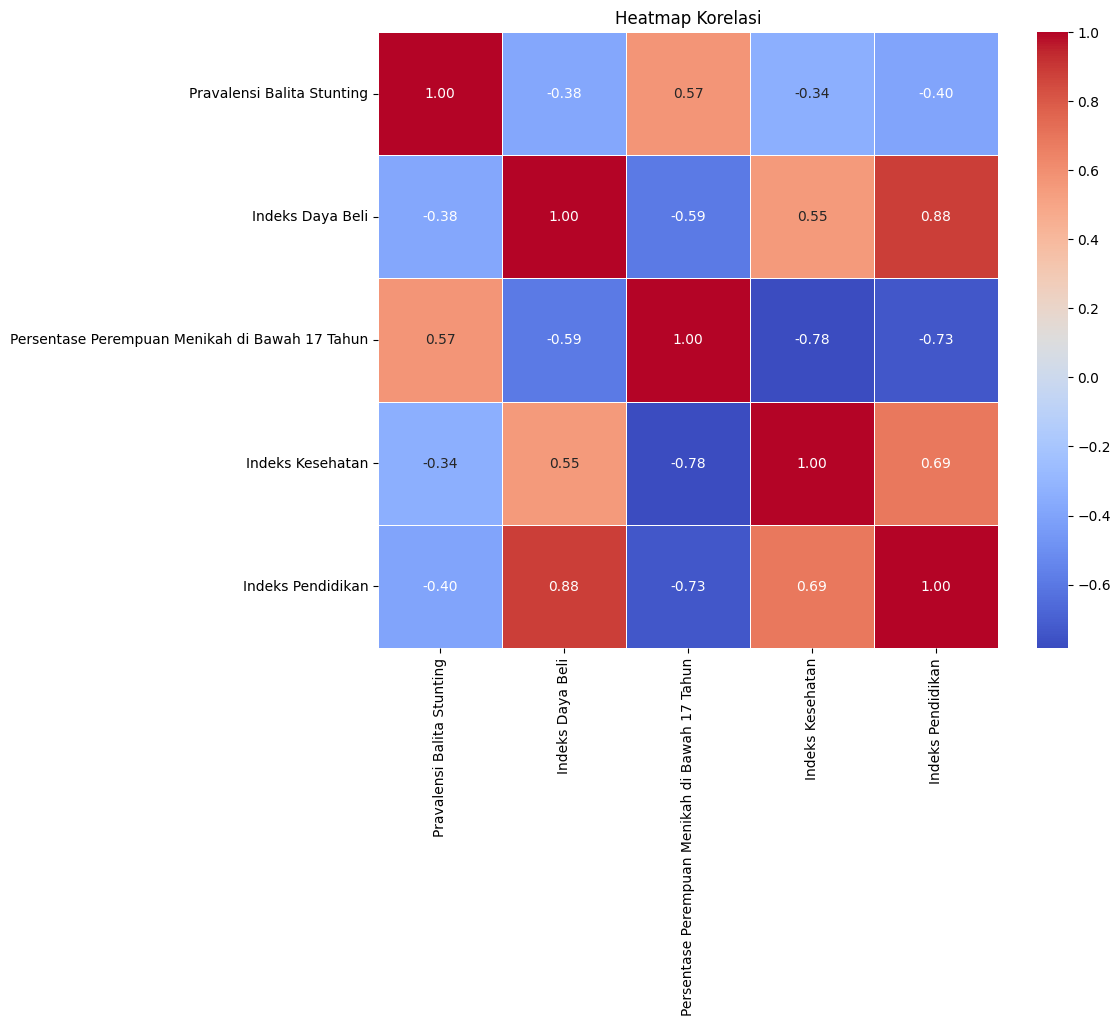

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()

# New Section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Nama Kota                                       38 non-null     object 
 1   Pravalensi Balita Stunting                      38 non-null     float64
 2   Indeks Daya Beli                                38 non-null     float64
 3   Persentase Perempuan Menikah di Bawah 17 Tahun  38 non-null     float64
 4   Indeks Kesehatan                                38 non-null     float64
 5   Indeks Pendidikan                               38 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.9+ KB


In [ ]:
sample = df['Persentase Perempuan Menikah di Bawah 17 Tahun']

Text(0.5, 0, 'Sample')

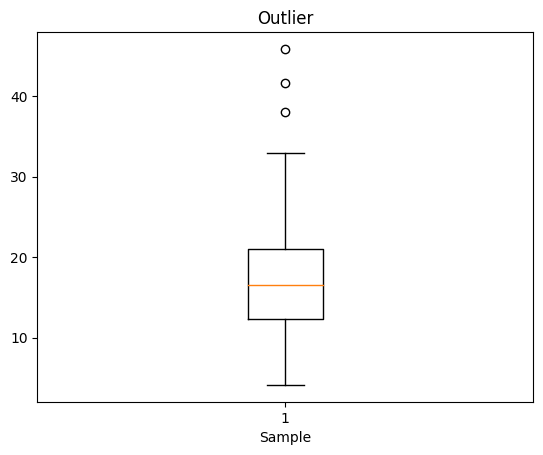

In [ ]:
plt.boxplot(sample)
plt.title ("Outlier")
plt.xlabel('Sample')

In [ ]:
def detect_outliers_iqr(data):
  outliers = []
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)

  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)

  for i in data:
    if (i<lwr_bound or i>upr_bound):
      outliers.append(i)
  return outliers

sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [37.99, 41.61, 45.83]


In [ ]:
tr = []
for j in df['Persentase Perempuan Menikah di Bawah 17 Tahun']:
  f = j in detect_outliers_iqr(df['Persentase Perempuan Menikah di Bawah 17 Tahun'])
  if f is False:
    tr.append(j)
print(tr)

[14.99, 20.07, 20.01, 15.42, 15.4, 13.77, 17.12, 29.98, 32.91, 23.25, 21.1, 4.91, 14.85, 12.06, 17.34, 17.54, 12.99, 16.62, 23.74, 22.61, 16.45, 9.97, 13.15, 19.92, 20.91, 26.43, 5.82, 8.0, 6.26, 18.18, 10.75, 8.16, 4.14, 6.82, 15.2]


Text(0.5, 0, 'Sample')

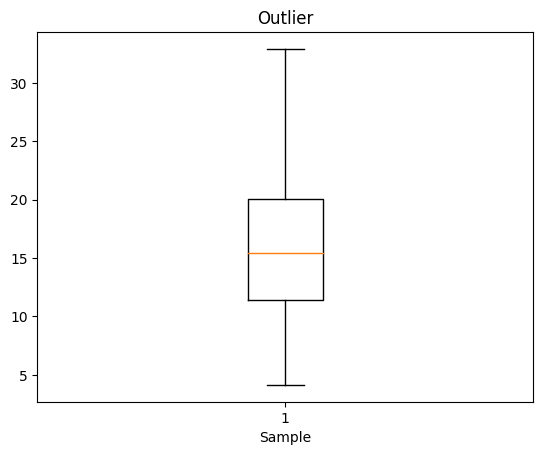

In [ ]:
plt.boxplot(tr)
plt.title ("Outlier")
plt.xlabel('Sample')

In [ ]:
statistics.median(sample)

16.535

In [ ]:
e = []
for y in sample:
  ff = y in sample_outliers
  if ff is True:
    y = statistics.median(sample)
  else :
    y = y
    e.append(float(y))
print(e)

[14.99, 20.07, 20.01, 15.42, 15.4, 13.77, 17.12, 29.98, 32.91, 23.25, 21.1, 4.91, 14.85, 12.06, 17.34, 17.54, 12.99, 16.62, 23.74, 22.61, 16.45, 9.97, 13.15, 19.92, 20.91, 26.43, 5.82, 8.0, 6.26, 18.18, 10.75, 8.16, 4.14, 6.82, 15.2]


Text(0.5, 0, 'Sample')

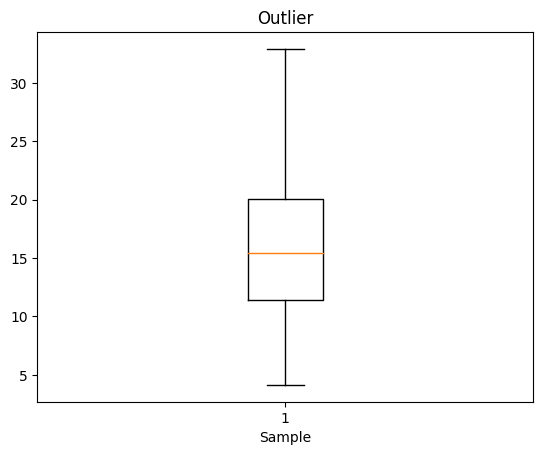

In [ ]:
plt.boxplot(e)
plt.title ("Outlier")
plt.xlabel('Sample')

In [ ]:
df['Persentase Perempuan Menikah di Bawah 17 Tahun'] = df['Persentase Perempuan Menikah di Bawah 17 Tahun'].apply(
    lambda y: statistics.median(sample) if y in sample_outliers or y > 30 else y
)

print(df)


                Nama Kota  Pravalensi Balita Stunting  Indeks Daya Beli  \
0       Kabupaten Pacitan                        20.6              0.68   
1      Kabupaten Ponorogo                        14.2              0.71   
2    Kabupaten Trenggalek                        19.5              0.70   
3   Kabupaten Tulungagung                        17.3              0.73   
4        Kabupaten Blitar                        14.3              0.73   
5        Kabupaten Kediri                        21.6              0.75   
6        Kabupaten Malang                        23.0              0.71   
7      Kabupaten Lumajang                        23.8              0.68   
8        Kabupaten Jember                        34.9              0.70   
9    Kabupaten Banyuwangi                        18.1              0.77   
10    Kabupaten Bondowoso                        32.0              0.73   
11    Kabupaten Situbondo                        30.9              0.71   
12  Kabupaten Probolinggo

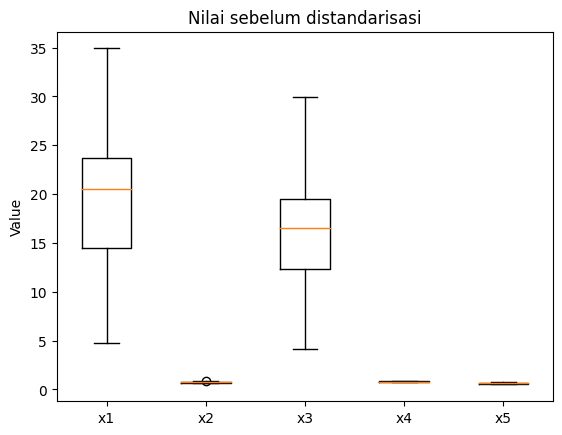

In [ ]:
df_clean = df.drop(['Nama Kota'], axis = 1)

fig, ax = plt.subplots()

ax.boxplot(df_clean)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['x1', 'x2', 'x3', 'x4', 'x5'])

ax.set_ylabel("Value")


ax.set_title("Nilai sebelum distandarisasi")
plt.show()


Text(0.5, 0, 'Sample')

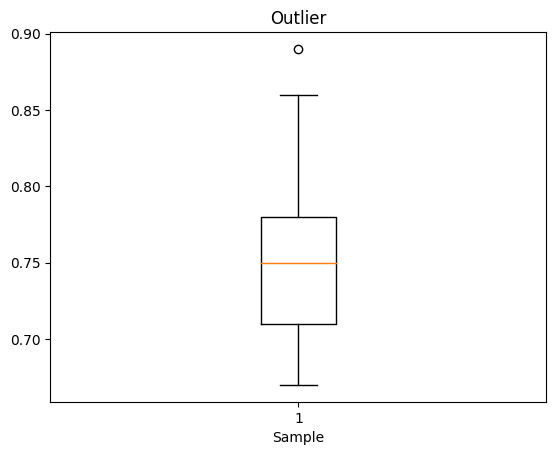

In [ ]:
sample1 = df['Indeks Daya Beli']
plt.boxplot(sample1)
plt.title ("Outlier")
plt.xlabel('Sample')

In [ ]:
df['Indeks Daya Beli'] = df['Indeks Daya Beli'].apply(
    lambda y: statistics.median(sample1) if  y > 0.88 else y
)

print(df)

                Nama Kota  Pravalensi Balita Stunting  Indeks Daya Beli  \
0       Kabupaten Pacitan                        20.6              0.68   
1      Kabupaten Ponorogo                        14.2              0.71   
2    Kabupaten Trenggalek                        19.5              0.70   
3   Kabupaten Tulungagung                        17.3              0.73   
4        Kabupaten Blitar                        14.3              0.73   
5        Kabupaten Kediri                        21.6              0.75   
6        Kabupaten Malang                        23.0              0.71   
7      Kabupaten Lumajang                        23.8              0.68   
8        Kabupaten Jember                        34.9              0.70   
9    Kabupaten Banyuwangi                        18.1              0.77   
10    Kabupaten Bondowoso                        32.0              0.73   
11    Kabupaten Situbondo                        30.9              0.71   
12  Kabupaten Probolinggo

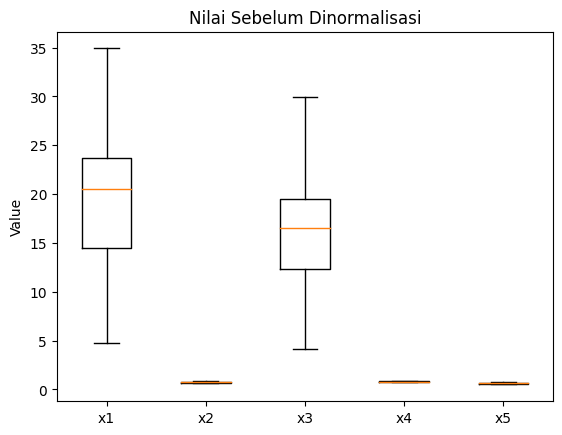

In [ ]:
df_clean = df.drop(['Nama Kota'], axis = 1)

fig, ax = plt.subplots()

ax.boxplot(df_clean)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['x1', 'x2', 'x3', 'x4', 'x5'])

ax.set_ylabel("Value")

ax.set_title("Nilai Sebelum Dinormalisasi")
plt.show()

In [ ]:
df_clean = df.drop(['Nama Kota'], axis = 1)

In [ ]:
min_max_scaler = MinMaxScaler()
columns_to_normalize = ['Pravalensi Balita Stunting', 'Indeks Daya Beli', 'Persentase Perempuan Menikah di Bawah 17 Tahun', 'Indeks Kesehatan', 'Indeks Pendidikan']

df_clean[columns_to_normalize] = min_max_scaler.fit_transform(df_clean[columns_to_normalize])

data_normalized = df_clean[columns_to_normalize]
print(data_normalized)

    Pravalensi Balita Stunting  Indeks Daya Beli  \
0                     0.524917          0.052632   
1                     0.312292          0.210526   
2                     0.488372          0.157895   
3                     0.415282          0.315789   
4                     0.315615          0.315789   
5                     0.558140          0.421053   
6                     0.604651          0.210526   
7                     0.631229          0.052632   
8                     1.000000          0.157895   
9                     0.441860          0.526316   
10                    0.903654          0.315789   
11                    0.867110          0.210526   
12                    0.614618          0.368421   
13                    0.521595          0.263158   
14                    0.375415          0.789474   
15                    0.225914          0.578947   
16                    0.574751          0.421053   
17                    0.504983          0.526316   
18          

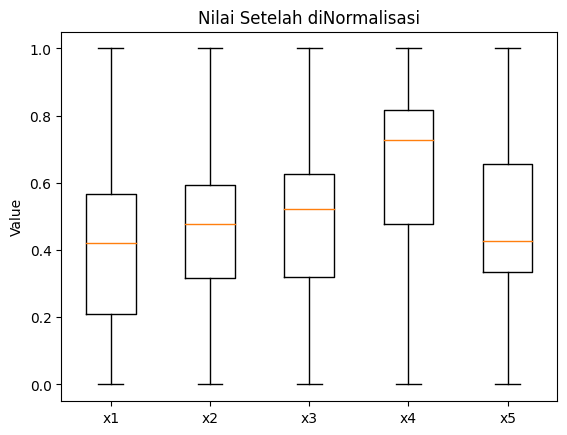

In [ ]:
data1 = pd.concat([data_normalized['Indeks Daya Beli'], data_normalized['Persentase Perempuan Menikah di Bawah 17 Tahun'], data_normalized['Pravalensi Balita Stunting'], data_normalized['Indeks Kesehatan'], data_normalized['Indeks Pendidikan']], axis=1)


fig, ax = plt.subplots()
ax.boxplot(data1)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['x1', 'x2', 'x3', 'x4', 'x5'])

ax.set_ylabel("Value")

ax.set_title("Nilai Setelah diNormalisasi")
plt.show()

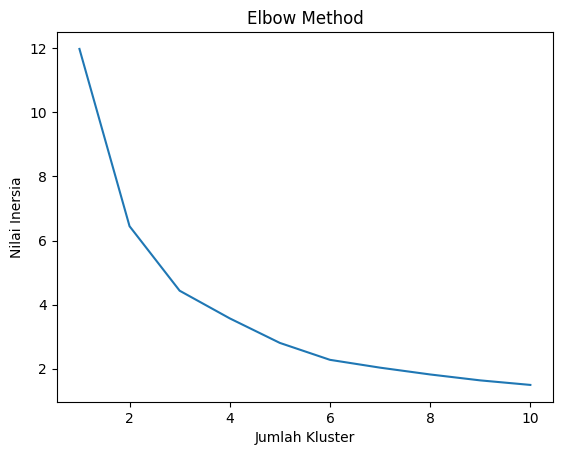

In [ ]:
# Menentukan Range Nilai K
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia_values.append(kmeans.inertia_)

# Visualisasi Elbow Plot
plt.plot(k_values, inertia_values)
plt.xlabel("Jumlah Kluster")
plt.ylabel("Nilai Inersia")
plt.title("Elbow Method")
plt.show()

k paling optimal adalah 3

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state= 0, init = 'k-means++', n_init = 10, max_iter = 300).fit(data_normalized)
pred = kmeans.predict(data_normalized)
data_normalized['Cluster'] = kmeans.labels_
data_normalized.head(40)

,Pravalensi Balita Stunting,Indeks Daya Beli,Persentase Perempuan Menikah di Bawah 17 Tahun,Indeks Kesehatan,Indeks Pendidikan,Cluster
0,0.524917,0.052632,0.419892,0.727273,0.370370,2
1,0.312292,0.210526,0.616486,0.818182,0.444444,2
2,0.488372,0.157895,0.614164,0.909091,0.333333,2
3,0.415282,0.315789,0.436533,1.000000,0.518519,2
4,0.315615,0.315789,0.435759,0.909091,0.333333,2
5,0.558140,0.421053,0.372678,0.727273,0.481481,2
6,0.604651,0.210526,0.502322,0.727273,0.407407,2
7,0.631229,0.052632,1.000000,0.454545,0.148148,1
8,1.000000,0.157895,0.479683,0.272727,0.296296,1
9,0.441860,0.526316,0.739551,0.545455,0.370370,2


In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.27782392 0.73026316 0.10139319 0.92045455 0.90277778]
 [0.60852713 0.15789474 0.62661249 0.34090909 0.2191358 ]
 [0.50572167 0.40350877 0.46759976 0.72727273 0.47942387]]


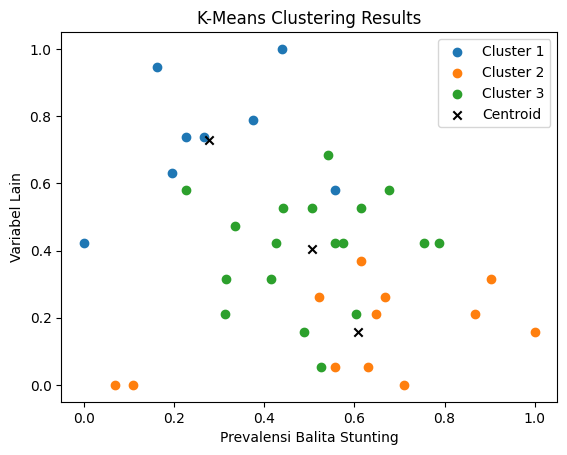

In [ ]:
for i in range(3):
    cluster_data = data_normalized[data_normalized['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroid')

plt.title('K-Means Clustering Results')
plt.xlabel('Prevalensi Balita Stunting')
plt.ylabel('Variabel Lain')
plt.legend()
plt.show()

korelasi, stunting tertinggi, terendah, dll

In [ ]:
data12 = pd.concat([
    data_normalized['Indeks Daya Beli'],
    data_normalized['Persentase Perempuan Menikah di Bawah 17 Tahun'],
    data_normalized['Pravalensi Balita Stunting'],
    data_normalized['Indeks Kesehatan'],
    data_normalized['Indeks Pendidikan'],
    df['Nama Kota'], data_normalized['Cluster']
], axis=1)

In [ ]:
data12.head

<bound method NDFrame.head of     Indeks Daya Beli  Persentase Perempuan Menikah di Bawah 17 Tahun  \
0           0.052632                                        0.419892   
1           0.210526                                        0.616486   
2           0.157895                                        0.614164   
3           0.315789                                        0.436533   
4           0.315789                                        0.435759   
5           0.421053                                        0.372678   
6           0.210526                                        0.502322   
7           0.052632                                        1.000000   
8           0.157895                                        0.479683   
9           0.526316                                        0.739551   
10          0.315789                                        0.479683   
11          0.210526                                        0.479683   
12          0.368421              

In [ ]:
print(data12['Cluster'].value_counts())

2    18
1    12
0     8
Name: Cluster, dtype: int64


In [ ]:
cluster_1_cities = data12[data12['Cluster'] == 1]['Nama Kota']

print("Cities in Cluster 1:")
print(cluster_1_cities.tolist())

Cities in Cluster 1:
['Kabupaten Lumajang', 'Kabupaten Jember', 'Kabupaten Bondowoso', 'Kabupaten Situbondo', 'Kabupaten Probolinggo', 'Kabupaten Pasuruan', 'Kabupaten Bojonegoro', 'Kabupaten Tuban', 'Kabupaten Bangkalan', 'Kabupaten Sampang', 'Kabupaten Pamekasan', 'Kabupaten Sumenep']


In [ ]:
cluster_0_cities = data12[data12['Cluster'] == 0]['Nama Kota']

print("Cities in Cluster 1:")
print(cluster_0_cities.tolist())

Cities in Cluster 1:
['Kabupaten Sidoarjo', 'Kabupaten Gresik', 'Kota Kediri', 'Kota Blitar', 'Kota Malang', 'Kota Mojokerto', 'Kota Madiun', 'Kota Surabaya']


In [ ]:
cluster_2_cities = data12[data12['Cluster'] == 2]['Nama Kota']

print("Cities in Cluster 1:")
print(cluster_2_cities.tolist())

Cities in Cluster 1:
['Kabupaten Pacitan', 'Kabupaten Ponorogo', 'Kabupaten Trenggalek', 'Kabupaten Tulungagung', 'Kabupaten Blitar', 'Kabupaten Kediri', 'Kabupaten Malang', 'Kabupaten Banyuwangi', 'Kabupaten Mojokerto', 'Kabupaten Jombang', 'Kabupaten Nganjuk', 'Kabupaten Madiun', 'Kabupaten Magetan', 'Kabupaten Ngawi', 'Kabupaten Lamongan', 'Kota Probolinggo', 'Kota Pasuruan', 'Kota Batu']


In [ ]:
data_Stunting_Nikah= pd.concat([data_normalized['Pravalensi Balita Stunting'], data_normalized['Persentase Perempuan Menikah di Bawah 17 Tahun']], axis=1)

kmeans = KMeans(n_clusters = 3, random_state= 0, init = 'k-means++', n_init = 10, max_iter = 300).fit(data_Stunting_Nikah)
pred = kmeans.predict(data_Stunting_Nikah)
data_Stunting_Nikah['Cluster'] = kmeans.labels_
data_Stunting_Nikah.head(40)

,Pravalensi Balita Stunting,Persentase Perempuan Menikah di Bawah 17 Tahun,Cluster
0,0.524917,0.419892,0
1,0.312292,0.616486,1
2,0.488372,0.614164,1
3,0.415282,0.436533,1
4,0.315615,0.435759,1
5,0.558140,0.372678,0
6,0.604651,0.502322,0
7,0.631229,1.000000,1
8,1.000000,0.479683,0
9,0.441860,0.739551,1


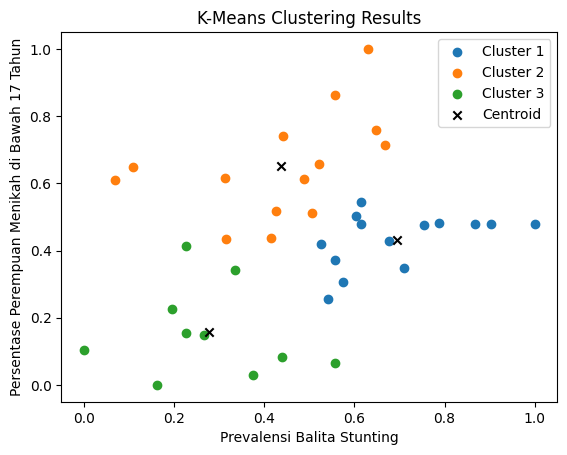

In [ ]:
for i in range(kmeans.n_clusters):
    cluster_data = data_Stunting_Nikah[data_Stunting_Nikah['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroid')

plt.title('K-Means Clustering Results')
plt.xlabel('Prevalensi Balita Stunting')
plt.ylabel('Persentase Perempuan Menikah di Bawah 17 Tahun')
plt.legend()

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.69530138 0.43252433]
 [0.43640247 0.65170279]
 [0.27840532 0.15681115]]


In [ ]:
data_Stunting_IDB = pd.concat([data_normalized['Pravalensi Balita Stunting'], data_normalized['Indeks Daya Beli']], axis=1)

kmeans = KMeans(n_clusters = 3, random_state= 0, init = 'k-means++', n_init = 10, max_iter = 300).fit(data_Stunting_IDB)
pred = kmeans.predict(data_Stunting_IDB)
data_Stunting_IDB['Cluster'] = kmeans.labels_
data_Stunting_IDB.head(40)

,Pravalensi Balita Stunting,Indeks Daya Beli,Cluster
0,0.524917,0.052632,0
1,0.312292,0.210526,1
2,0.488372,0.157895,0
3,0.415282,0.315789,1
4,0.315615,0.315789,1
5,0.558140,0.421053,0
6,0.604651,0.210526,0
7,0.631229,0.052632,0
8,1.000000,0.157895,0
9,0.441860,0.526316,2


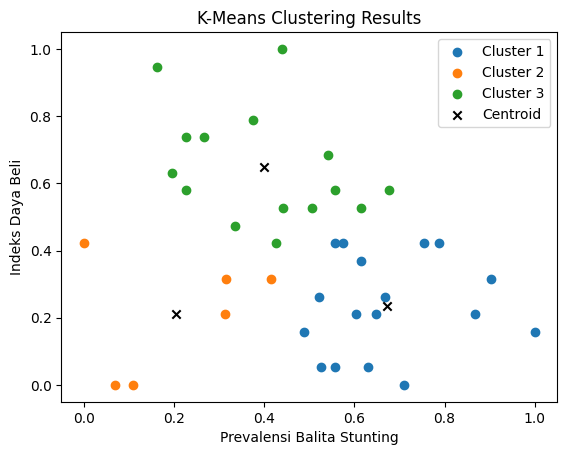

In [ ]:
for i in range(3):
    cluster_data = data_Stunting_IDB[data_Stunting_IDB['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroid')

plt.title('K-Means Clustering Results')
plt.xlabel('Prevalensi Balita Stunting')
plt.ylabel('Indeks Daya Beli')
plt.legend()
plt.show()

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.6714872  0.23529412]
 [0.20376523 0.21052632]
 [0.39933555 0.64912281]]


In [ ]:
data_Stunting_Health = pd.concat([data_normalized['Pravalensi Balita Stunting'], data_normalized['Indeks Kesehatan']], axis=1)

kmeans = KMeans(n_clusters = 3, random_state= 0, init = 'k-means++', n_init = 10, max_iter = 300).fit(data_Stunting_Health)
pred = kmeans.predict(data_Stunting_Health)
data_Stunting_Health['Cluster'] = kmeans.labels_
data_Stunting_Health.head(40)

,Pravalensi Balita Stunting,Indeks Kesehatan,Cluster
0,0.524917,0.727273,0
1,0.312292,0.818182,2
2,0.488372,0.909091,2
3,0.415282,1.000000,2
4,0.315615,0.909091,2
5,0.558140,0.727273,0
6,0.604651,0.727273,0
7,0.631229,0.454545,0
8,1.000000,0.272727,1
9,0.441860,0.545455,0


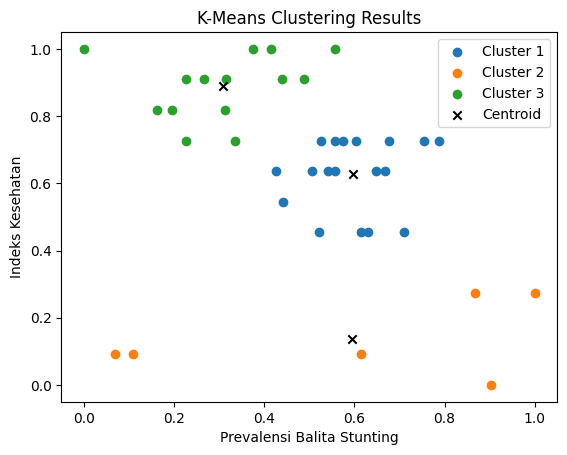

In [ ]:
for i in range(3):
    cluster_data = data_Stunting_Health[data_Stunting_Health['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroid')

plt.title('K-Means Clustering Results')
plt.xlabel('Prevalensi Balita Stunting')
plt.ylabel('Indeks Kesehatan')
plt.legend()
plt.show()

In [ ]:
data_Stunting_Edu = pd.concat([data_normalized['Pravalensi Balita Stunting'], data_normalized['Indeks Pendidikan']], axis=1)

kmeans = KMeans(n_clusters = 3, random_state= 0, init = 'k-means++', n_init = 10, max_iter = 300).fit(data_Stunting_Edu)
pred = kmeans.predict(data_Stunting_Edu)
data_Stunting_Edu['Cluster'] = kmeans.labels_
data_Stunting_Edu.head(40)

,Pravalensi Balita Stunting,Indeks Pendidikan,Cluster
0,0.524917,0.370370,0
1,0.312292,0.444444,0
2,0.488372,0.333333,0
3,0.415282,0.518519,0
4,0.315615,0.333333,0
5,0.558140,0.481481,0
6,0.604651,0.407407,0
7,0.631229,0.148148,2
8,1.000000,0.296296,2
9,0.441860,0.370370,0


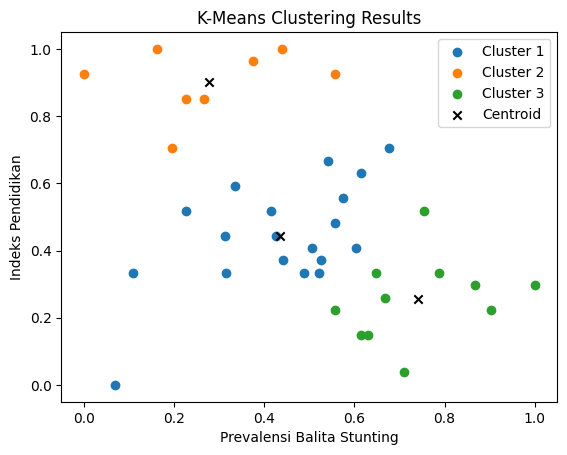

In [ ]:
for i in range(3):
    cluster_data = data_Stunting_Edu[data_Stunting_Edu['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroid')

plt.title('K-Means Clustering Results')
plt.xlabel('Prevalensi Balita Stunting')
plt.ylabel('Indeks Pendidikan')
plt.legend()
plt.show()

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.43486624 0.44444444]
 [0.27782392 0.90277778]
 [0.74025974 0.25589226]]


In [ ]:
data_normalized.describe()

,Pravalensi Balita Stunting,Indeks Daya Beli,Persentase Perempuan Menikah di Bawah 17 Tahun,Indeks Kesehatan,Indeks Pendidikan,Cluster
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.490208,0.394737,0.440718,0.645933,0.486355,1.263158
std,0.233708,0.259217,0.232819,0.273781,0.269588,0.794719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320598,0.210526,0.315499,0.477273,0.333333,1.000000
50%,0.523256,0.421053,0.478038,0.727273,0.425926,1.000000
75%,0.627076,0.565789,0.593847,0.818182,0.657407,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
data_normalized['Rata-rata Indeks'] = ( data_normalized['Indeks Kesehatan'] + data_normalized['Indeks Daya Beli'] + data_normalized['Indeks Pendidikan'] ) / 3
data_normalized['Stunting_NikahDini'] = ( data_normalized['Pravalensi Balita Stunting'] + data_normalized['Persentase Perempuan Menikah di Bawah 17 Tahun']) / 2

data_normalized.head

<bound method NDFrame.head of     Pravalensi Balita Stunting  Indeks Daya Beli  \
0                     0.524917          0.052632   
1                     0.312292          0.210526   
2                     0.488372          0.157895   
3                     0.415282          0.315789   
4                     0.315615          0.315789   
5                     0.558140          0.421053   
6                     0.604651          0.210526   
7                     0.631229          0.052632   
8                     1.000000          0.157895   
9                     0.441860          0.526316   
10                    0.903654          0.315789   
11                    0.867110          0.210526   
12                    0.614618          0.368421   
13                    0.521595          0.263158   
14                    0.375415          0.789474   
15                    0.225914          0.578947   
16                    0.574751          0.421053   
17                    0.504983    

In [ ]:
data_Stunting_RRI_Nikah = pd.concat([data_normalized['Stunting_NikahDini'], data_normalized['Rata-rata Indeks']], axis=1)

kmeans = KMeans(n_clusters = 3, random_state= 0, init = 'k-means++', n_init = 10, max_iter = 300).fit(data_Stunting_RRI_Nikah)
pred = kmeans.predict(data_Stunting_RRI_Nikah)
data_Stunting_RRI_Nikah['Cluster'] = kmeans.labels_
data_Stunting_RRI_Nikah.head(40)

,Stunting_NikahDini,Rata-rata Indeks,Cluster
0,0.472404,0.383425,0
1,0.464389,0.491051,0
2,0.551268,0.466773,0
3,0.425907,0.611436,0
4,0.375687,0.519405,0
5,0.465409,0.543269,0
6,0.553487,0.448402,0
7,0.815615,0.218442,2
8,0.739841,0.242306,2
9,0.590706,0.480714,0


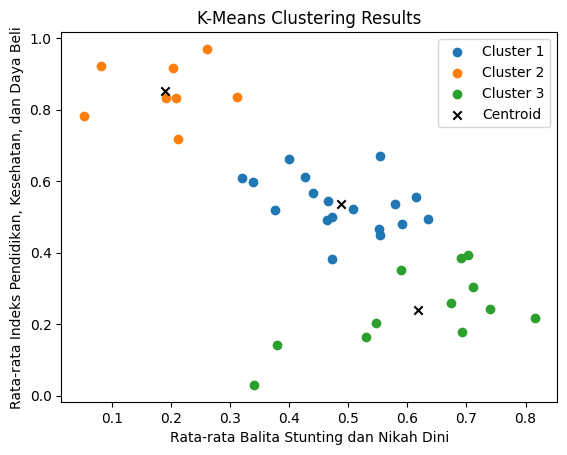

In [ ]:
for i in range(3):
    cluster_data = data_Stunting_RRI_Nikah[data_Stunting_RRI_Nikah['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroid')

plt.title('K-Means Clustering Results')
plt.xlabel('Rata-rata Balita Stunting dan Nikah Dini')
plt.ylabel('Rata-rata Indeks Pendidikan, Kesehatan, dan Daya Beli')
plt.legend()
plt.show()
